# Positional Salaries
This dataset provides insights into the salary distribution across different job positions, focusing on the hierarchical level and its correlation with salary progression. It serves as a valuable tool for exploring how compensation increases with professional advancement, helping organizations and individuals align expectations with industry standards.The concept of positional salaries revolves around the compensation structure assigned to various job roles within an organization. Salaries often vary based on factors such as job responsibilities, hierarchical rank, expertise, and the overall impact of the role on the organization’s objectives. Understanding positional salaries is crucial for workforce planning, talent acquisition, and career development.



Here's a detailed overview of the dataset:

1. Dataset Characteristics: 

   Size: 10 rows,

   Three columns:

* Position: Categorical data (text) representing the job title.

* Level: Numeric data (integer) indicating the hierarchy or rank of the position.

* Salary: Numeric data (integer) representing the annual salary associated with the position.

2. Potential Use Cases:

* Salary Prediction: Use regression models to predict salaries for different levels or positions.

* Career Progression Analysis: Analyze how salary grows with hierarchical levels.

* Categorical Data Insights: Explore correlations between positions and salary/level.

## Importing Libraries

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

## Loading the Dataset

In [16]:
data_set=pd.read_csv(r"C:\Users\alant\Downloads\Position_Salaries.csv")
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


## Data Cleaning

#### This is to check whether there is any null values,duplicates values present in the dataset.If yes, you can use drop() function to remove those null or duplicates

In [17]:
data_set.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [18]:
data_set.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

## Taking the first 5 rows using head() function

In [19]:
data_set.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Taking the last 5 rows using tail() function


In [20]:
data_set.tail(5)

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Seperating dependent & Independent variables

In [21]:

x= data_set["Level"]
y= data_set["Salary"]
x=pd.DataFrame(x)



## Split the Dataset into Training & Testing

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

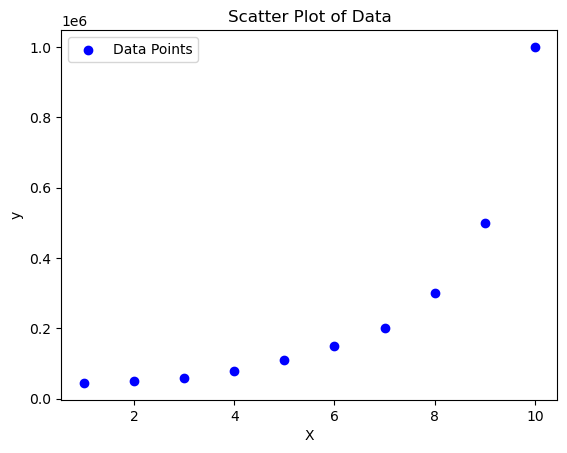

In [23]:

plt.scatter(x, y, color="blue", label="Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of Data")
plt.legend()
plt.show()



## Building the Polynomial Regression model

In [24]:

degree=4
poly = PolynomialFeatures(degree=4)


x_train_poly=poly.fit_transform(x_train)
x_train_poly=pd.DataFrame(x_train_poly)
x_test_poly=poly.fit_transform(x_test)
x_test_poly=pd.DataFrame(x_test_poly)


In [25]:
model = LinearRegression()
model.fit(x_train_poly, y_train)


LinearRegression()

## Predicting the test data & Calculating the accuracy

In [26]:
y_pred = model.predict(x_test_poly)


In [27]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 = r2_score(y_test, y_pred)*100
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.2f}","%")



Mean absolute error: 28553.55333852707
Root mean squared error: 38573.733638372076
Mean Squared Error (MSE): 1487932926.8041
R-squared (R2): 96.93 %


## Summary

This dataset captures information about salaries associated with various job positions and their corresponding hierarchical levels. It provides valuable insights into the relationship between career progression and compensation.Salaries show a clear increasing trend with higher levels.The dataset is clean, with no missing values.
The relationship between Level and Salary appears nonlinear, suggesting the need for advanced modeling techniques like polynomial regression for accurate predictions.This dataset is ideal for analyzing the dynamics of compensation in organizational structures and can be used to model nonlinear trends effectively.


Potential Applications:
* Regression Modeling: Predicting salaries for intermediate or hypothetical positions.

* Career Analysis: Understanding how salaries grow with promotions or hierarchical advancements.

* Market Trends: Comparing the salary progression in this dataset with industry benchmarks.
